# Определение перспективного тарифа для телеком компании


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов
### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

# Описание данных

##### Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана
##### Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок
* Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение
##### Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
##### Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#import pandas as pd
#
#from matplotlib import pyplot as plt
#import warnings
#warnings.filterwarnings (action = 'ignore')
#import seaborn as sns
#from functools import reduce

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from math import ceil as math
from functools import reduce

In [3]:
# посмотрим на данные
# проблемы только с звонками длительностью 0.00
# пропусков нет
data_calls = pd.read_csv('calls.csv')
data_calls.head(5)
#data_calls.isnull().sum(axis=0).sort_values()
#(data_calls['duration'] == '0.00').count()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# посмотрим на данные
# пропусков нет
data_internet = pd.read_csv('internet.csv')
data_internet.head(5)
#data_internet.isnull().sum(axis=0).sort_values()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
# посмотрим на данные
# пропусков нет
data_messages = pd.read_csv('messages.csv')
data_messages.head(5)
#data_messages.isnull().sum(axis=0).sort_values()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
# пропусков нет, просто описание двух тарифов
data_tariffs = pd.read_csv('tariffs.csv')
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})
data_tariffs.head(10)

#data_tariffs.isnull().sum(axis=0).sort_values()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
# пропуски в 'churn_date', но это говорит о том, что клиент не прекращал пользоваться этим тарифом
data_users = pd.read_csv('users.csv')
data_users.sample(15)

#data_users.isnull().sum(axis=0).sort_values()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
487,1487,72,NaN,Кострома,Рудольф,Кириллов,2018-08-13,smart
210,1210,33,NaN,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart
107,1107,45,NaN,Орёл,Руслан,Воронин,2018-07-20,smart
172,1172,40,NaN,Санкт-Петербург,Алан,Карасев,2018-05-05,smart
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
236,1236,30,NaN,Москва,Леон,Демидов,2018-12-22,smart
27,1027,62,NaN,Петрозаводск,Владислав,Авдеев,2018-04-10,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
447,1447,25,NaN,Москва,Александра,Алешина,2018-09-13,smart


### Вывод: пропуски в dataframe 'data_users', но они связаны с тем, что на момент выгрузки данных клиент не прекращал пользоваться тарифом, можно заполнить эти пропуски днём выгрузки данных, но необязательно. Также есть звонки длительностью 0 секунд, скорее всего позвонить человеку просто не получилось.

# Шаг 2. Подготовьте данные

In [8]:
data_calls.info()
from datetime import datetime
from datetime import date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя:

In [9]:
# Обработаем записи о звонках (calls)
# Удалим записи с нулевой продолжительностью:
print('Количество записей до удаления:', len(data_calls)) # 202607
data_calls = data_calls.loc[data_calls['duration'] != 0]
print('Количество записей после удаления:', len(data_calls)) # 162994
# показателль минут округляем в большую сторону:
data_calls['duration']=data_calls['duration'].apply(np.ceil).astype('int')

##меняем типы данных для data_calls
data_calls['id']=data_calls['id'].astype('int')
##data_calls['call_date']=data_calls['call_date'].astype('Data')
data_calls['call_date']=pd.to_datetime(data_calls['call_date'])
## для того чтобы рассчитать по месяцам нужно добавить столбец 'month'
data_calls['month'] = pd.to_datetime(data_calls['call_date']).dt.month
#
## делаем сводную таблицу с группировкой по "user_id" и "month"
calls_pivot = data_calls.pivot_table(index=['user_id', 'month'], values=['duration'],  aggfunc=['sum', 'count'])
#
## Переименуем названия столбцов  
calls_pivot.columns = ['calls_duration', 'calls_count']
#
## смотрим что получилось
calls_pivot.head()

Количество записей до удаления: 202607
Количество записей после удаления: 162994


calls_duration  calls_count
user_id month                             
1000    5                 159           17
        6                 172           28
        7                 340           41
        8                 408           42
        9                 466           46

In [10]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Объем израсходованного интернет-трафика по месяцам для каждого пользователя

In [11]:

# Обработаем записи о сессиях в интернете (internet)
# Исключим из рассмотрения сессии с нулевой продолжительностью:
print('Количество записей до удаления:', len(data_internet)) # 149396
data_internet = data_internet.loc[data_internet['mb_used'] != 0]
print('Количество записей после удаления:', len(data_internet)) # 129798 

# показателль mb_used округляем в большую сторону:
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil).astype('int')

#меняем типы данных для data_internet
data_internet['session_date']=pd.to_datetime(data_internet['session_date'])
data_internet['id']=data_internet['id'].astype('int')
data_internet['month'] = pd.to_datetime(data_internet['session_date']).dt.month
# группируем таблицу таким образом, чтобы посмотреть какой пользователь в какой месяц сколько потратил интернета
data_internet_grouped = data_internet.pivot_table(index=['month', 'user_id'], values='mb_used',
                                                   aggfunc=['sum'])
data_internet_grouped.columns = ['mb_used']
data_internet_grouped

Количество записей до удаления: 149396
Количество записей после удаления: 129798


mb_used
month user_id         
1     1005        2730
      1032       24147
      1045        2348
      1055       17111
      1071       15622
...                ...
12    1494       17645
      1495       23450
      1496       20757
      1497       19940
      1499       13077

[3201 rows x 1 columns]

In [12]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
#меняем типы данных для users
data_users['churn_date']=pd.to_datetime(data_users['churn_date'])
data_users['reg_date']=pd.to_datetime(data_users['reg_date'])

In [14]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### количество отправленных сообщений по месяцам для каждого пользователя:

In [16]:
data_messages['id']=data_messages['id'].astype('int')
data_messages['message_date']=pd.to_datetime(data_messages['message_date'])
# для того чтобы рассчитать по месяцам нужно добавить столбец 'month'
data_messages['month'] = pd.to_datetime(data_messages['message_date']).dt.month

data_messages
data_messages_grouped = data_messages.pivot_table(index=['month', 'user_id'], values='id', aggfunc=['count'])
data_messages_grouped.columns= ['sms_total_in_month']                                
data_messages_grouped

sms_total_in_month
month user_id                    
1     1005                      7
      1032                     38
      1045                      5
      1055                     30
      1071                     16
...                           ...
12    1493                     78
      1495                     84
      1496                     51
      1497                     17
      1499                     66

[2717 rows x 1 columns]

In [17]:
data_tariffs
#row2 = data_tariffs.iloc[1]
#row2['messages_included']

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
data_tariffs
data_users.set_index('user_id', inplace=True)
data_users.sample(5)

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
1344,60,NaT,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
1282,59,NaT,Ульяновск,Артём,Аракчеев,2018-01-21,smart
1255,40,2018-09-02,Саранск,Серафима,Пономарева,2018-02-19,ultra


In [19]:
#data_users_grouped_count =data_users.pivot_table(index=['tariff'], values='user_id',aggfunc=['count'])
#data_users_grouped_count 
# тарифом смарт пользуются 351 пользователь, тарифом ультра 149

In [20]:
#data_messages_grouped = data_messages.pivot_table(index=['month', 'user_id'], values='id',
#                                                   aggfunc=['count'])
#all_calls = calls_data_grouped_count['sum'].sum()
 

In [21]:
# записываем таблицы в массив
total_group = [calls_pivot, data_messages_grouped, data_internet_grouped]
total_group
## группируем таблицы с помощью merge(), вызывая два аргумента в функции reduce()
grouped_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), total_group)
grouped_data.sample(10)
# присоединяем ещё одну таблицу с пользователями
Data_analysis = data_users.join(grouped_data, how='outer')
Data_analysis.reset_index(inplace = True)
# удаляем столбцы, которые не нужны нам для аналитики
Data_analysis.drop(['age', 'first_name', 'last_name',], axis='columns', inplace=True)
Data_analysis.head()
Data_analysis.duplicated().sum()
Data_analysis

,user_id,month,churn_date,city,reg_date,tariff,calls_duration,calls_count,sms_total_in_month,mb_used
0,1000,5,NaT,Краснодар,2018-05-25,ultra,159.0,17.0,22.0,2256.0
1,1000,6,NaT,Краснодар,2018-05-25,ultra,172.0,28.0,60.0,23257.0
2,1000,7,NaT,Краснодар,2018-05-25,ultra,340.0,41.0,75.0,14016.0
3,1000,8,NaT,Краснодар,2018-05-25,ultra,408.0,42.0,81.0,14070.0
4,1000,9,NaT,Краснодар,2018-05-25,ultra,466.0,46.0,57.0,14581.0
...,...,...,...,...,...,...,...,...,...,...
3209,1328,12,NaT,Мурманск,2018-10-16,ultra,NaN,NaN,7.0,39461.0
3210,1473,12,NaT,Красноярск,2018-08-05,ultra,NaN,NaN,20.0,18432.0
3211,1489,12,NaT,Санкт-Петербург,2018-08-15,smart,NaN,NaN,35.0,17341.0
3212,1240,2,NaT,Воронеж,2018-02-27,ultra,NaN,NaN,NaN,961.0


In [22]:
Data_analysis.isnull().sum(axis=0).sort_values()
# пропуски в данных у тех пользователей, кто не пользуется сообщениями или интернетом, поэтому просто заполним 0

user_id                  0
month                    0
city                     0
reg_date                 0
tariff                   0
mb_used                 13
calls_duration          46
calls_count             46
sms_total_in_month     497
churn_date            3027
dtype: int64

In [23]:
Data_analysis['mb_used'] = Data_analysis['mb_used'].fillna(0)
Data_analysis['calls_duration'] = Data_analysis['calls_duration'].fillna(0)
Data_analysis['calls_count'] = Data_analysis['calls_count'].fillna(0)
Data_analysis['sms_total_in_month'] = Data_analysis['sms_total_in_month'].fillna(0)
#data_tariffs
Data_analysis.isnull().sum(axis=0).sort_values()
Data_analysis.duplicated().sum()

0

In [24]:
Data_analysis

,user_id,month,churn_date,city,reg_date,tariff,calls_duration,calls_count,sms_total_in_month,mb_used
0,1000,5,NaT,Краснодар,2018-05-25,ultra,159.0,17.0,22.0,2256.0
1,1000,6,NaT,Краснодар,2018-05-25,ultra,172.0,28.0,60.0,23257.0
2,1000,7,NaT,Краснодар,2018-05-25,ultra,340.0,41.0,75.0,14016.0
3,1000,8,NaT,Краснодар,2018-05-25,ultra,408.0,42.0,81.0,14070.0
4,1000,9,NaT,Краснодар,2018-05-25,ultra,466.0,46.0,57.0,14581.0
...,...,...,...,...,...,...,...,...,...,...
3209,1328,12,NaT,Мурманск,2018-10-16,ultra,0.0,0.0,7.0,39461.0
3210,1473,12,NaT,Красноярск,2018-08-05,ultra,0.0,0.0,20.0,18432.0
3211,1489,12,NaT,Санкт-Петербург,2018-08-15,smart,0.0,0.0,35.0,17341.0
3212,1240,2,NaT,Воронеж,2018-02-27,ultra,0.0,0.0,0.0,961.0


In [25]:
Data_analysis = Data_analysis.merge(data_tariffs, on='tariff', how='left')

In [26]:
def  revenue(row):
    
    # создаем базу, абонентскую плату, клиент ее в любом случае платит
    # при наличии перерасхода к абонентской плате прибавляется плата за перерасход
    
    revenue = row['rub_monthly_fee']
    
    # далее бежим по условиям и в случае, когда они срабатывают положительно, то считается плата за перерасход и прибавляется
    # к абонентской плате
    
    if row['calls_duration'] > row['minutes_included']:
        
        revenue +=  (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
        
    if row['sms_total_in_month']>row['messages_included']:
        
        revenue += (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
        
    if row['mb_used'] > row['mb_per_month_included']:
        
        #переводим мегабайты в гигабайты и округляем в большую сторону
        revenue += np.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
        
        
    return revenue
        
# применяем функцию

Data_analysis['profit'] = Data_analysis.apply(revenue, axis=1)

In [27]:
#Data_analysis['profit'] = Data_analysis.apply(profit_Megaline, axis=1)
Data_analysis.head(10)

,user_id,month,churn_date,city,reg_date,tariff,calls_duration,calls_count,sms_total_in_month,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,5,NaT,Краснодар,2018-05-25,ultra,159.0,17.0,22.0,2256.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,NaT,Краснодар,2018-05-25,ultra,172.0,28.0,60.0,23257.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,NaT,Краснодар,2018-05-25,ultra,340.0,41.0,75.0,14016.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,NaT,Краснодар,2018-05-25,ultra,408.0,42.0,81.0,14070.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,NaT,Краснодар,2018-05-25,ultra,466.0,46.0,57.0,14581.0,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10,NaT,Краснодар,2018-05-25,ultra,350.0,44.0,73.0,14717.0,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11,NaT,Краснодар,2018-05-25,ultra,338.0,37.0,58.0,14768.0,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12,NaT,Краснодар,2018-05-25,ultra,333.0,38.0,70.0,9827.0,1000,30720,3000,1950,150,1,1,1950.0
8,1001,11,NaT,Москва,2018-11-01,smart,430.0,45.0,0.0,18452.0,50,15360,500,550,200,3,3,1350.0
9,1001,12,NaT,Москва,2018-11-01,smart,414.0,47.0,0.0,14053.0,50,15360,500,550,200,3,3,550.0


In [28]:
Data_analysis.info()
Data_analysis['profit']=Data_analysis['profit'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   churn_date             187 non-null    datetime64[ns]
 3   city                   3214 non-null   object        
 4   reg_date               3214 non-null   datetime64[ns]
 5   tariff                 3214 non-null   object        
 6   calls_duration         3214 non-null   float64       
 7   calls_count            3214 non-null   float64       
 8   sms_total_in_month     3214 non-null   float64       
 9   mb_used                3214 non-null   float64       
 10  messages_included      3214 non-null   int64         
 11  mb_per_month_included  3214 non-null   int64         
 12  minutes_included       3214 non-null   int64         
 13  rub

In [29]:
#Data_analysis = Data_analysis.query("profit != 0")

In [30]:
Data_analysis.shape[0]

3214

In [31]:
Data_analysis['profit'].sort_values()

2899     550
447      550
448      550
450      550
453      550
        ... 
1789    5321
1618    5672
3099    5680
260     5709
3100    6770
Name: profit, Length: 3214, dtype: int32

In [32]:
profit_smart = Data_analysis.pivot_table(index=['tariff'], values='profit', aggfunc=['mean'])
profit_smart

,mean
,profit
tariff,
smart,1294.63930
ultra,2071.06599


In [33]:
k_profit_smart= profit_smart.iloc[0]
k_profit_ultra= profit_smart.iloc[1]
A = k_profit_ultra/k_profit_smart
print(A)

mean  profit    1.599724
dtype: float64


In [34]:
Data_analysis.isnull().sum(axis=0).sort_values()

user_id                     0
rub_per_message             0
rub_per_gb                  0
rub_monthly_fee             0
minutes_included            0
mb_per_month_included       0
messages_included           0
mb_used                     0
sms_total_in_month          0
calls_count                 0
calls_duration              0
tariff                      0
reg_date                    0
city                        0
month                       0
rub_per_minute              0
profit                      0
churn_date               3027
dtype: int64

### Вывод: Мы рассчитали  прибыль с каждого пользователя с учетом абонентской платы. По среднему значению тариф ultra приносит на 67% больше прибыли, чем тариф smart. 

In [35]:
# КОД РЕВЬЮВЕРА

# проще наверное посмотреть % разницу

k_profit_smart= profit_smart.iloc[0]
k_profit_ultra= profit_smart.iloc[1]
A = ((k_profit_ultra - k_profit_smart) / k_profit_ultra) * 100
print(A)

mean  profit    37.48923
dtype: float64


# Шаг 3. Проанализируйте данные


## Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

In [36]:
# разделяем таблицу по тарифам
smart_tariff = Data_analysis[Data_analysis['tariff'] == 'smart']
ultra_tariff = Data_analysis[Data_analysis['tariff'] == 'ultra']

In [37]:
# считаем потраченное в среднем пользователем за каждым месяц 
smart_tariff_median = smart_tariff.pivot_table(index=['month'], values=['calls_duration','sms_total_in_month', 'mb_used', 'profit'],
                                                    aggfunc='median')
smart_tariff_pd = pd.DataFrame(smart_tariff_median.to_records())
smart_tariff_pd.set_index(['month'], inplace = True)
smart_tariff_pd

,calls_duration,mb_used,profit,sms_total_in_month
month,,,,
1,162.5,7107.0,550.0,15.0
2,258.0,12572.5,550.0,20.0
3,409.0,15690.0,886.0,23.0
4,368.5,14104.5,620.5,28.0
5,433.0,16343.0,986.0,30.0
6,400.0,16095.5,950.0,28.0
7,414.0,15948.0,992.0,29.0
8,432.0,16855.0,1093.0,27.0
9,435.0,16050.0,958.5,30.0


In [38]:
# считаем сколько в среднем в месяц нужно смс, количество минут, интернета пользователю по тарифу smart
mean_in_month_calls_smart = (smart_tariff_pd['calls_duration'].sum() / 12).round()
mean_in_month_mb_smart = smart_tariff_pd['mb_used'].sum() / 12
mean_in_month_sms_smart = (smart_tariff_pd['sms_total_in_month'].sum() / 12).round()
mean_in_month_smart = [mean_in_month_calls_smart, mean_in_month_mb_smart, mean_in_month_sms_smart]
mean_in_month_smart

[387.0, 15232.625, 26.0]

In [39]:
# преобразовал в DataFrame, чтобы красивее выглядело
mean_in_month_smart = pd.DataFrame([mean_in_month_smart])
mean_in_month_smart.columns = ['mean_in_month_calls', 'mean_in_month_mb','mean_in_month_sms']
mean_in_month_smart

,mean_in_month_calls,mean_in_month_mb,mean_in_month_sms
0,387.0,15232.625,26.0


In [40]:
smart_tariff.head(1)
#smart_tariff['profit'] = smart_tariff['profit'].astype('int')
#smart_tariff.info()

,user_id,month,churn_date,city,reg_date,tariff,calls_duration,calls_count,sms_total_in_month,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
8,1001,11,NaT,Москва,2018-11-01,smart,430.0,45.0,0.0,18452.0,50,15360,500,550,200,3,3,1350


In [41]:

#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа Smart
#for column in smart_tariff[['calls_duration','sms_total_in_month','mb_used','profit']]:
#    print('Среднее {}: {:.0f}'.format(column,smart_tariff[column].mean()))
#    print('Медиана {}: {:.0f}'.format(column,smart_tariff[column].median()))
#    print('Дисперсия {}: {:.0f}'.format(column,np.var(smart_tariff[column])))
#    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(smart_tariff[column])))
    



for column in smart_tariff[['calls_duration','sms_total_in_month', 'mb_used', 'profit']]:

    print('mean {}: {:.0f}'.format(column,smart_tariff[column].mean()))
    print('median {}: {:.0f}'.format(column,smart_tariff[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(smart_tariff[column]), ddoff = 1))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(smart_tariff[column]), ddoff = 1))
    
    
    
    
    
    
    
    ## Рассчитываю дисперсию по тарифу smart
#row_smart = smart_tariff_pd.describe().round().iloc[2]
#row_smart_pd_σ = pd.DataFrame([row_smart])
#row_smart_pd_σ**2

mean calls_duration: 418
median calls_duration: 422
Дисперсия calls_duration: 36203
Среднее отклонение calls_duration: 190 

mean sms_total_in_month: 33
median sms_total_in_month: 28
Дисперсия sms_total_in_month: 796
Среднее отклонение sms_total_in_month: 28 

mean mb_used: 16229
median mb_used: 16531
Дисперсия mb_used: 34530413
Среднее отклонение mb_used: 5876 

mean profit: 1295
median profit: 1038
Дисперсия profit: 673629
Среднее отклонение profit: 821 



In [42]:
## Стандартное отклонение по тарифу smart
#row_smart_pd_std = pd.DataFrame([row_smart])
#row_smart_pd_std

In [43]:
smart_tariff_pd.describe().round()

,calls_duration,mb_used,profit,sms_total_in_month
count,12.0,12.0,12.0,12.0
mean,387.0,15233.0,937.0,26.0
std,88.0,2923.0,252.0,5.0
min,162.0,7107.0,550.0,15.0
25%,392.0,15294.0,820.0,26.0
50%,421.0,16073.0,972.0,28.0
75%,432.0,16900.0,1107.0,29.0
max,471.0,17741.0,1350.0,30.0


In [44]:
ultra_tariff_median = ultra_tariff.pivot_table(index=['month'], values=['calls_duration','sms_total_in_month', 'mb_used', 'profit'],
                                                    aggfunc='median')
ultra_tariff_pd = pd.DataFrame(ultra_tariff_median.to_records())
ultra_tariff_pd.set_index(['month'], inplace = True)
ultra_tariff_pd.describe().round()
ultra_tariff_pd

,calls_duration,mb_used,profit,sms_total_in_month
month,,,,
1,382.0,14808.0,1950,32.0
2,168.0,7335.5,1950,5.5
3,403.0,17513.0,1950,20.0
4,453.0,16662.0,1950,17.0
5,519.0,18717.0,1950,25.0
6,479.0,19495.5,1950,27.5
7,542.0,20034.0,1950,38.0
8,500.0,18945.0,1950,40.0
9,520.0,19675.0,1950,43.0


In [45]:
# считаем сколько в среднем в месяц нужно смс, количество минут, интернета пользователю по тарифу ultra
mean_in_month_calls_ultra = (ultra_tariff_pd['calls_duration'].sum() / 11).round()
mean_in_month_mb_ultra = (ultra_tariff_pd['mb_used'].sum() / 11).round()
mean_in_month_sms_ultra = (ultra_tariff_pd['sms_total_in_month'].sum() / 11).round()
mean_in_month_ultra = [mean_in_month_calls_ultra, mean_in_month_mb_ultra, mean_in_month_sms_ultra]
mean_in_month_ultra

[512.0, 19449.0, 36.0]

In [46]:
# преобразовал в DataFrame, чтобы красивее выглядело
mean_in_month_ultra = pd.DataFrame([mean_in_month_ultra])
mean_in_month_ultra.columns = ['mean_in_month_calls', 'mean_in_month_mb','mean_in_month_sms']
mean_in_month_ultra

,mean_in_month_calls,mean_in_month_mb,mean_in_month_sms
0,512.0,19449.0,36.0


In [47]:
for column in ultra_tariff[['calls_duration','sms_total_in_month', 'mb_used', 'profit']]:

    print('mean {}: {:.0f}'.format(column,ultra_tariff[column].mean()))
    print('median {}: {:.0f}'.format(column,ultra_tariff[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(ultra_tariff[column]), ddoff = 1))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(ultra_tariff[column]), ddoff = 1))






## Рассчитываю дисперсию по тарифу ultra
#row_ultra = ultra_tariff_pd.describe().round().iloc[2]
#row_ultra_pd_σ = pd.DataFrame([row_ultra])
#row_ultra_pd_σ**2

mean calls_duration: 527
median calls_duration: 518
Дисперсия calls_duration: 100771
Среднее отклонение calls_duration: 317 

mean sms_total_in_month: 49
median sms_total_in_month: 38
Дисперсия sms_total_in_month: 2283
Среднее отклонение sms_total_in_month: 48 

mean mb_used: 19487
median mb_used: 19324
Дисперсия mb_used: 101832133
Среднее отклонение mb_used: 10091 

mean profit: 2071
median profit: 1950
Дисперсия profit: 143346
Среднее отклонение profit: 379 



In [48]:
ultra_tariff_pd.describe().round()

,calls_duration,mb_used,profit,sms_total_in_month
count,12.0,12.0,12.0,12.0
mean,469.0,17828.0,1950.0,33.0
std,112.0,3788.0,0.0,14.0
min,168.0,7336.0,1950.0,6.0
25%,440.0,17300.0,1950.0,24.0
50%,510.0,18831.0,1950.0,35.0
75%,535.0,19765.0,1950.0,43.0
max,584.0,21994.0,1950.0,51.0


In [49]:
## Стандартное отклонение по тарифу ultra
#row_ultra_pd_std = pd.DataFrame([row_ultra])
#row_ultra_pd_std

In [50]:
# Стандартное отклонение по тарифу smart
#row_smart_pd_std

In [51]:
# среднее по месяцам по тарифу смарт
mean_in_month_smart

,mean_in_month_calls,mean_in_month_mb,mean_in_month_sms
0,387.0,15232.625,26.0


In [52]:
# среднее по месяцам по тарифу ultra
mean_in_month_ultra

,mean_in_month_calls,mean_in_month_mb,mean_in_month_sms
0,512.0,19449.0,36.0


<a name="stage_1"></a>
 ##### [Выручка на клиента и средняя по тарифам](#stage_1)
 
 [обратно к комментарию Андрея](#contents)

In [53]:
# средняя выручка по тарифам:
profit_pivot = Data_analysis.pivot_table(index = 'tariff', values = 'profit', aggfunc = ['mean'])
display(profit_pivot)

,mean
,profit
tariff,
smart,1294.63930
ultra,2071.06599


In [54]:
# выручка на одного уникального клиента
pivot_profit_user_id=Data_analysis.pivot_table(index=('user_id'), values = 'profit', aggfunc = ['sum'])
pivot_profit_user_id

,sum
,profit
user_id,
1000,15600
1001,1900
1002,7250
1003,9750
1004,15600
...,...
1495,11550
1496,28551


In [55]:
# КОД РЕВЬЮВЕРА

pivot_revenue = Data_analysis.pivot_table(index = 'tariff', values = ['profit', 'user_id'], aggfunc = {'profit': np.sum, 'user_id': lambda x: x.nunique()})
pivot_revenue.columns = ['sum_revenue', 'unique_users']
pivot_revenue['revenue_per_user'] = pivot_revenue['sum_revenue'] // pivot_revenue['unique_users']
display(pivot_revenue)

,sum_revenue,unique_users,revenue_per_user
tariff,,,
smart,2885751,350,8245
ultra,2040000,148,13783


In [56]:
# КОД РЕВЬЮВЕРА

# по сути я бы вообще свел к чему то такому

calls_pivot = Data_analysis.pivot_table(index = 'tariff', values = 'calls_duration', aggfunc = ['mean', 'median', 'var', 'std'])
display(calls_pivot)

,mean,median,var,std
,calls_duration,calls_duration,calls_duration,calls_duration
tariff,,,,
smart,417.934948,422.0,36219.315784,190.313730
ultra,526.623350,518.0,100873.633397,317.606098


### Вывод:  
* Стандартное отклонение по прибыли между пользователями с тарифами smart и ultra отличается чуть больше чем в два раза, что нормально, потому что пользователей с тарифом смарт в два раза больше, следовательно и отклонение меньше.
* Пользователям обоих тарифом в среднем достаточно количество минут по тарифу смарт - 500, хотя в ultra входит гораздо больше - 3000.
*  Пользователи тарифа ультра не писали смс в 4 месяце - апреле по случайному стечению обстоятельств), нам важно это отметить, потому что среднюю в гистрограмме мы будем строить по всем пользователям, а значит среднее количество смс пользователей по тарифу ultra должно увеличиться. Но в любом случае сообщений очень мало, что логично, благодаря мессенджерам. Сейчас мы видим, что в среднем за месяц пользователи обоих тарифов укладываются в включенные сообщения по тарифу смарт - 50, хотя в тариф ultra включено - 1000.
*  Пользователи обоих тарифов используют больше интернета, чем у них включено. Надо передать в отдел, отвечающий за ценовую политику тарифом с целью перерасмотреть и увеличить количество включенных гигабайт, потому что пользователю некофмортно платить сверхурочные по тарифу, наша цель проработать с клиентом как можно дольше.

### Гистрограммы буду строить по всем пользователям

In [57]:
#Напишем функцию для построения гистограмм
def histogram_drawing(column, title):
    sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.5',
               'figure.facecolor': '0.99'})
    plt.figure(figsize=(20,12))
    plt.title(title, fontsize=30)
    sns.distplot(smart_tariff[column], label='Тариф Smart', kde=False, color="y")
    sns.distplot(ultra_tariff[column], label='Тариф Ultra', kde=False)
    plt.axvline(np.mean(smart_tariff[column]),color='green', linestyle='dashed', label='Smart среднее')
    plt.axvline(np.mean(ultra_tariff[column]),color= 'red', linestyle='-', label='Ultra среднее')
    plt.legend()

C:\Users\list2\anaconda3.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


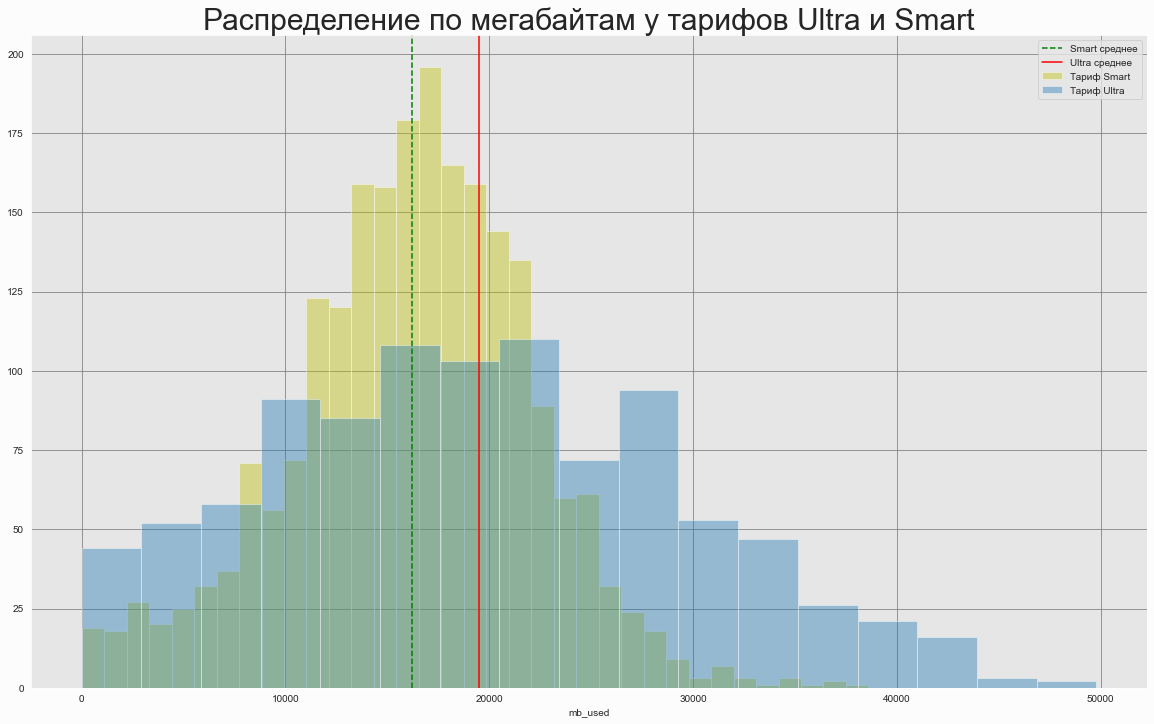

In [58]:
#Построим гистограммы для mb_used тарифов ultra и smart
histogram_drawing('mb_used', 'Распределение по мегабайтам у тарифов Ultra и Smart')

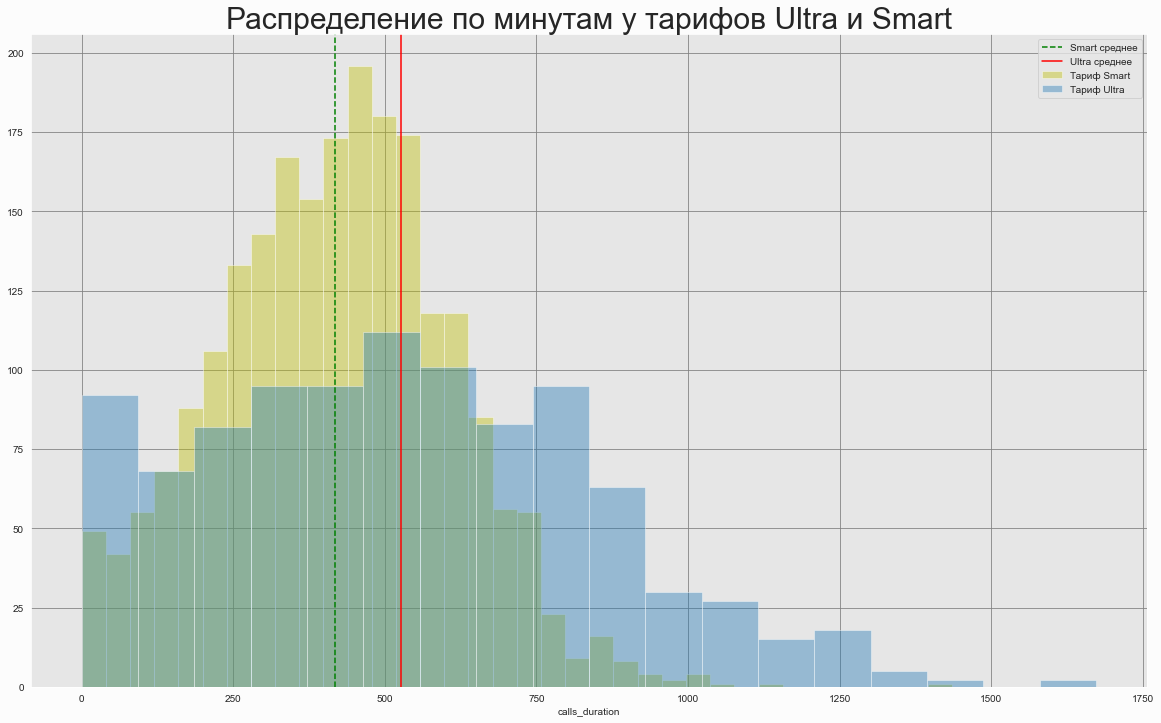

In [59]:
#Построим гистограммы для minutes тарифов ultra и smart
histogram_drawing('calls_duration','Распределение по минутам у тарифов Ultra и Smart')

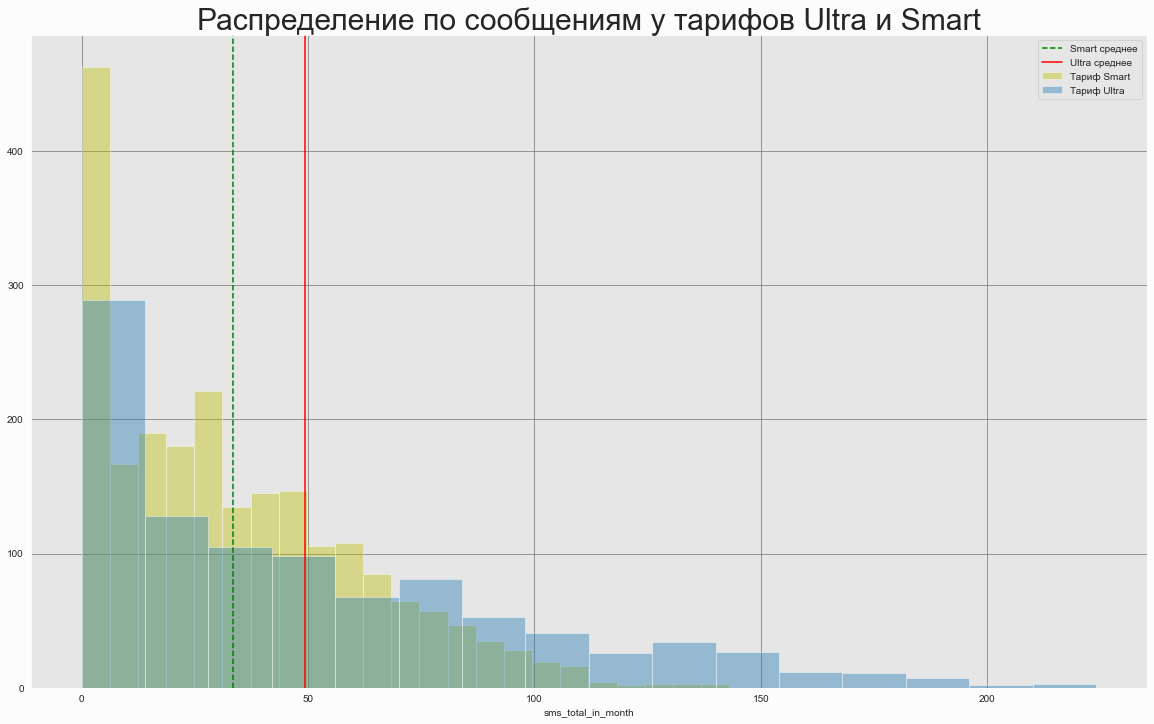

In [60]:
#Построим гистограммы для messages тарифов ultra и smart
histogram_drawing('sms_total_in_month','Распределение по сообщениям у тарифов Ultra и Smart')

In [61]:
#Data_analysis['profit']= Data_analysis[Data_analysis['tariff'] == 'smart']['profit'] + 550
#
##Data_analysis = pd.DataFrame([Data_analysis])
#Data_analysis['profit'] = Data_analysis[Data_analysis['tariff'] == 'ultra']['profit'] + 1950
#Data_analysis
#Data_analysis.boxplot('profit', by='tariff', figsize=(10,10)).set_ylim(0,7000)

#data_tariffs.rename(columns = {"tariff_name":"tariff"}, inplace = True)
#data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'}) - важно
data_tariffs
#Data_analysis = Data_analysis.merge(data_tariffs, on='tariff', how='outer') - важно

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [62]:
Data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   churn_date             187 non-null    datetime64[ns]
 3   city                   3214 non-null   object        
 4   reg_date               3214 non-null   datetime64[ns]
 5   tariff                 3214 non-null   object        
 6   calls_duration         3214 non-null   float64       
 7   calls_count            3214 non-null   float64       
 8   sms_total_in_month     3214 non-null   float64       
 9   mb_used                3214 non-null   float64       
 10  messages_included      3214 non-null   int64         
 11  mb_per_month_included  3214 non-null   int64         
 12  minutes_included       3214 non-null   int64         
 13  rub

(0.0, 7000.0)

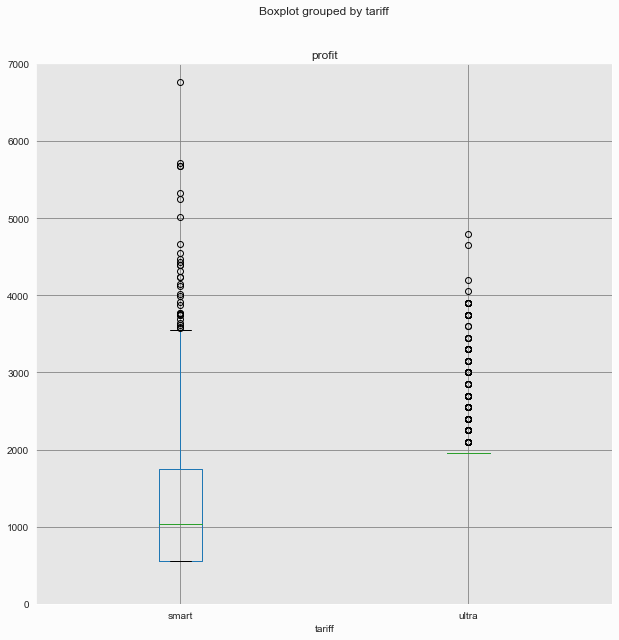

In [63]:
#Data_analysis['rub_monthly_fee']=Data_analysis['rub_monthly_fee'].astype('float')
#Data_analysis['profit'] = Data_analysis['profit'] + Data_analysis['rub_monthly_fee'] 
Data_analysis.boxplot('profit', by='tariff', figsize=(10,10)).set_ylim(0,7000)

In [64]:
# КОД РЕВЬЮВЕРА

difference_profit = (Data_analysis[Data_analysis['tariff'] == 'ultra']['profit'].median() - Data_analysis[Data_analysis['tariff'] == 'smart']['profit'].median()) / Data_analysis[Data_analysis['tariff'] == 'ultra']['profit'].median() * 100 
print("соотношение:{:.3f}".format(difference_profit))

соотношение:46.769


### Вывод: по медианным значениям profit тарифa ультра на 258% прибыльнее тарифа smart

<a name="stage_1"></a>
##### [Выручка на клиента и средняя по тарифам](#stage_1)
#####  <a name="contents">обратно к комментарию Андрея</a>

# Проверка гипотез

__первая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается__  
__вторая гипотеза:  __

* нулевая гипотеза:  выручка пользователей по тарифам не отличается 
* альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [65]:
smart_tariff_value = Data_analysis[Data_analysis['tariff'] == 'smart']['profit']
ultra_tariff_value = Data_analysis[Data_analysis['tariff'] == 'ultra']['profit']
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(ultra_tariff_value, smart_tariff_value, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530846e-246
Отвергаем нулевую гипотезу


### Вывод: Ранее мы получили, что выручка пользователей 'Ultra' и 'Smart' отличалась. В данном случае мы также отвергаем нулевую гипотезу

In [66]:
data_users.sample(5)
data_users['city'] = data_users['city'].str.lower()

In [67]:
moscow = Data_analysis[Data_analysis['city'] == 'Москва']['profit']
other_cities = Data_analysis[Data_analysis['city'] != 'Москва']['profit']

In [68]:
moscow = moscow.dropna()
moscow.isnull().sum(axis=0)


0

In [69]:
other_cities = other_cities.dropna()
other_cities.isnull().sum(axis=0)


0

In [70]:
#Data_analysis[Data_analysis['city_y'] == 'москва']

* нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
* альтернаятивная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [71]:
#проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(moscow, other_cities, equal_var=False, nan_policy = 'omit')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


### Вывод: Исходя из нашего теста мы видим, что средняя выручка пользователей с Москвы не отличается от пользователей из других регионов. Проведя тест мы не смогли отвергнуть нулевую гипотезу

## Общий вывод: 
1. Пользователям обоих тарифов в среднем не хватает интернета, включенного в тариф.
2. В тариф ultra включено слишком много минут на разговоры и смс
3. Проверив гипотезу выяснилось, что с 84% вероятностью выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
4. Несмотря на то что пользователи тарифа 'smart' чаще переплачивают по тарифу, чем пользователи тарифа 'ultra'.  В конечном итоге тариф 'ultra' выходит пользователю гораздо дороже
5. В первую очередь надо оптимизировать тариф 'ultra', потому что тариф хуже покрывает потребности клиента, чем тариф 'smart'